Linear regression

*   Import Numpy module for mathematicsl calulations
*   Import Pandas for Data Pre-processing
*   Import Matplotlib for Data Visualisation


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [22]:
df = pd.read_csv('Medical.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Data Pre-processing

In [34]:
#Map the categorical attributes to numerical values

df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

In [35]:
#pre-process the data

df['age'] = (df['age'] - df['age'].mean()) / df['age'].std()
df['bmi'] = (df['bmi'] - df['bmi'].mean()) / df['bmi'].std()
df['children'] = (df['children'] - df['children'].mean()) / df['children'].std()

In [25]:
#seperate the target attribute

X = df[['age', 'sex', 'bmi', 'children', 'smoker']].values
y = df['charges'].values

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [36]:
class LinearRegression:
    def __init__(self, learning_rate=0.0001, num_iterations=1000000):      #constructor
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit_model(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        # Gradient Descent
        for _ in range(self.num_iterations):
            y_predicted = self.predict(X)
            
            # Update weights and bias
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)
            self.weights =self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

    def predict(self, X): 
        return np.dot(X, self.weights) + self.bias

In [37]:
lr = LinearRegression(0.0002,1000000) #reating an object for linear regresion class
lr.fit_model(X_train, y_train)

# Make predictions on the test set
y_pred=lr.predict(X_test)
#print(y_pred)

# Evaluate the model using mean squared error (MSE)
mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error:",math.sqrt(mse))

Mean Squared Error: 5727.385558373314


SCatter plot Between actual and pedicted values

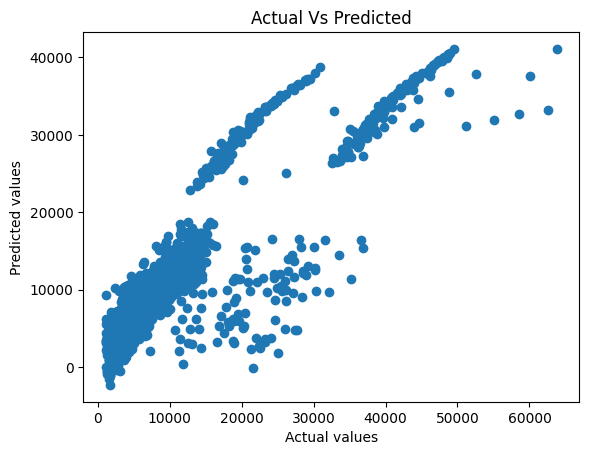

In [41]:
# Scatter plot of actual values vs predicted values
plt.scatter(y, lr.predict(X))
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual Vs Predicted')
plt.show()


Graph between Number of Iterations and Cost

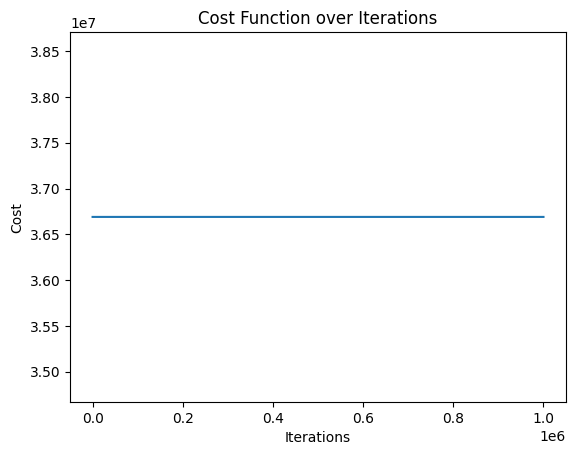

In [40]:
# Line plot of cost function over iterations
cost_history = []  # Store the cost function values over iterations

for i in range(lr.num_iterations):
    y_predicted = lr.predict(X)
    cost = np.mean((y_predicted - y) ** 2)  # Mean Squared Error
    cost_history.append(cost)

plt.plot(range(lr.num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()
